<a href="https://colab.research.google.com/github/silviabarasa/WEEK7COREIP/blob/master/Week7_Core_IP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Defining the Question

As a Data Scientist, you work for Hass Consulting Company which is a real estate leader with over 25 years of experience. You have been tasked to study the factors that affect housing prices using the given information on real estate properties that was collected over the past few months. Later onwards, create a model that would allow the company to accurately predict the sale of prices upon being provided with the predictor variables. [dataset](http://bit.ly/IndependentProjectWeek7Dataset) description is as follows:
## Data Features
* Id 
* price  - Price of the house
* bedrooms - Number of Bedrooms
* bathrooms - Number of Bathrooms
* sqft_living - Square feet area of living area
* sqft_lot  - Square feet area of parking Layout
* floors - Number of Floors
* waterfront - Whether waterfront is there or not
* view - Number of Views
* grade - Grades
* sqft_above
* sqft_basement - Square feet area off basement
* yr_built - Year the house is built
* yr_renovated - Year the house is renovated
* zipcode - zipcode os the house
* lat : Latitude of the house
* lon : Longitude of the house
* sqft_living15
* sqft_lot15

## a) Specifying the Question

 A prediction house prices using the Quantile and Regularization based  regression models

## b) Defining the Metric for Success
* Clean dataset
* Multiple Linear Regression model
* Quantile Regression model
* Ridge Regression model
* Lasso Regression model
* Elastic Net Regression model

# c) Understanding the context 

####  perform modeling using the given regression techniques then evaluate their performance. 
#### provide  observations and recommendation on the suitability of each of the tested models on their appropriateness of solving the given problem. 

* Multiple Linear Regression
* Quantile Regression
* Ridge Regression
* Lasso Regression
* Elastic Net Regression
### Required to perform each of the following:
* Find and deal with outliers, anomalies, and missing data within the dataset.
* Perform univariate, bivariate and multivariate analysis recording your observations.
* Performing regression analysis.
* Incorporate categorical independent variables into your models.
* Check for multicollinearity
* Provide a recommendation based on your analysis. 
* Create residual plots for your models, and assess heteroskedasticity using Barlett's test.
* Challenge your solution by providing insights on how you can make improvements in model improvement.

## d) Recording the Experimental Design
* Data preparation
* Data analysis
* Data modeling

## e) Data Relevance
The data was appropriate for the regression analysis that was needed.

# Reading the Data

In [ ]:
#Importing fundamental data exploration libaries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib

import matplotlib.pyplot as plt
from scipy.stats import skew
from scipy.stats.stats import pearsonr


#%config InlineBackend.figure_format = 'png' #set 'png' here when working on notebook
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

In [ ]:
#Loading the dataset
df = pd.read_csv('/content/Independent Project Week 7 - house_data.csv')

> Previewing the dataset

In [ ]:
# Viewing the first five rows
df.head()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,221900.000,3,1.000,1180,5650,1.000,0,0,3,7,1180,0,1955,0,98178,47.511,-122.257,1340,5650
1,6414100192,538000.000,3,2.250,2570,7242,2.000,0,0,3,7,2170,400,1951,1991,98125,47.721,-122.319,1690,7639
2,5631500400,180000.000,2,1.000,770,10000,1.000,0,0,3,6,770,0,1933,0,98028,47.738,-122.233,2720,8062
3,2487200875,604000.000,4,3.000,1960,5000,1.000,0,0,5,7,1050,910,1965,0,98136,47.521,-122.393,1360,5000
4,1954400510,510000.000,3,2.000,1680,8080,1.000,0,0,3,8,1680,0,1987,0,98074,47.617,-122.045,1800,7503


In [ ]:
#Viewing the last five rows
df.tail()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
21608,263000018,360000.000,3,2.500,1530,1131,3.000,0,0,3,8,1530,0,2009,0,98103,47.699,-122.346,1530,1509
21609,6600060120,400000.000,4,2.500,2310,5813,2.000,0,0,3,8,2310,0,2014,0,98146,47.511,-122.362,1830,7200
21610,1523300141,402101.000,2,0.750,1020,1350,2.000,0,0,3,7,1020,0,2009,0,98144,47.594,-122.299,1020,2007
21611,291310100,400000.000,3,2.500,1600,2388,2.000,0,0,3,8,1600,0,2004,0,98027,47.535,-122.069,1410,1287
21612,1523300157,325000.000,2,0.750,1020,1076,2.000,0,0,3,7,1020,0,2008,0,98144,47.594,-122.299,1020,1357


> Previewing information

In [ ]:
# checking for the shape of our dataset
df.shape

(21613, 20)

In [ ]:
#Checking for information about our dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   price          21613 non-null  float64
 2   bedrooms       21613 non-null  int64  
 3   bathrooms      21613 non-null  float64
 4   sqft_living    21613 non-null  int64  
 5   sqft_lot       21613 non-null  int64  
 6   floors         21613 non-null  float64
 7   waterfront     21613 non-null  int64  
 8   view           21613 non-null  int64  
 9   condition      21613 non-null  int64  
 10  grade          21613 non-null  int64  
 11  sqft_above     21613 non-null  int64  
 12  sqft_basement  21613 non-null  int64  
 13  yr_built       21613 non-null  int64  
 14  yr_renovated   21613 non-null  int64  
 15  zipcode        21613 non-null  int64  
 16  lat            21613 non-null  float64
 17  long           21613 non-null  float64
 18  sqft_l

# Data Cleaning

#### ***Validity***

In [ ]:
df.head()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,221900.000,3,1.000,1180,5650,1.000,0,0,3,7,1180,0,1955,0,98178,47.511,-122.257,1340,5650
1,6414100192,538000.000,3,2.250,2570,7242,2.000,0,0,3,7,2170,400,1951,1991,98125,47.721,-122.319,1690,7639
2,5631500400,180000.000,2,1.000,770,10000,1.000,0,0,3,6,770,0,1933,0,98028,47.738,-122.233,2720,8062
3,2487200875,604000.000,4,3.000,1960,5000,1.000,0,0,5,7,1050,910,1965,0,98136,47.521,-122.393,1360,5000
4,1954400510,510000.000,3,2.000,1680,8080,1.000,0,0,3,8,1680,0,1987,0,98074,47.617,-122.045,1800,7503


In [ ]:
# Dropping unnecessary columns
df.drop({'id','zipcode','lat','long'}, axis=1, inplace=True)

In [ ]:
#Outliers
# checking for outliers using IQR Scores
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1
(df < (Q1 - 1.5 * IQR)) |(df > (Q3 + 1.5 * IQR))


# The two commented lines of code below can be used to drop the outliers but for now I will not drop them since the whole dataset is important for my analysis

# df_no_outlier = df[~((df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))).any(axis = 1)]

# df_no_outlier

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,sqft_living15,sqft_lot15
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
21609,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
21610,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
21611,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


#### ***Consistency***

In [ ]:
# Checking for duplicates
df.duplicated().sum()

6

In [ ]:
# Dropping duplicates
df.drop_duplicates()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,sqft_living15,sqft_lot15
0,221900.000,3,1.000,1180,5650,1.000,0,0,3,7,1180,0,1955,0,1340,5650
1,538000.000,3,2.250,2570,7242,2.000,0,0,3,7,2170,400,1951,1991,1690,7639
2,180000.000,2,1.000,770,10000,1.000,0,0,3,6,770,0,1933,0,2720,8062
3,604000.000,4,3.000,1960,5000,1.000,0,0,5,7,1050,910,1965,0,1360,5000
4,510000.000,3,2.000,1680,8080,1.000,0,0,3,8,1680,0,1987,0,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,360000.000,3,2.500,1530,1131,3.000,0,0,3,8,1530,0,2009,0,1530,1509
21609,400000.000,4,2.500,2310,5813,2.000,0,0,3,8,2310,0,2014,0,1830,7200
21610,402101.000,2,0.750,1020,1350,2.000,0,0,3,7,1020,0,2009,0,1020,2007
21611,400000.000,3,2.500,1600,2388,2.000,0,0,3,8,1600,0,2004,0,1410,1287


#### ***Completeness***

In [ ]:
# Checking for null values
df.isnull().sum()

price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
sqft_living15    0
sqft_lot15       0
dtype: int64

# Eploratory Data Analysis

### ***Univariate Analysis***

#### ***Numeric variables***

***##Measures of central tendancy***

In [ ]:
#mean
df.mean().sort_values(ascending=False)

price           540182.159
sqft_lot         15106.968
sqft_lot15       12768.456
sqft_living       2079.900
sqft_living15     1986.552
yr_built          1971.005
sqft_above        1788.391
sqft_basement      291.509
yr_renovated        84.402
grade                7.657
condition            3.409
bedrooms             3.371
bathrooms            2.115
floors               1.494
view                 0.234
waterfront           0.008
dtype: float64

In [ ]:
df.columns

Index(['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade', 'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'sqft_living15', 'sqft_lot15'], dtype='object')

In [ ]:
#mode

d1 = df['price'].mode()
print("The mode for price is: \n", d1)
print('\n')
d2 = df['bedrooms'].mode()
print("The mode for bedrooms is: \n", d2)
print('\n')
d3 = df['sqft_living'].mode()
print("The mode for sqft_living is: \n", d3)
print('\n')
d4 = df['sqft_lot'].mode()
print("The mode for sqft_lot is: \n", d4)
print('\n')
d4 = df['floors'].mode()
print("The mode for floors is: \n", d4)
print('\n')
d4 = df['waterfront'].mode()
print("The mode for water front is: \n", d4)
print('\n')
d4 = df['view'].mode()
print("The mode for view is: \n", d4)
print('\n')
d4 = df['condition'].mode()
print("The mode for condition is: \n", d4)
print('\n')
d4 = df['grade'].mode()
print("The mode for grade is: \n", d4)
print('\n')
d4 = df['sqft_above'].mode()
print("The mode for sqft_above is: \n", d4)
print('\n')
d4 = df['sqft_basement'].mode()
print("The mode for sqft_basement is: \n", d4)
print('\n')
d4 = df['sqft_lot'].mode()
print("The mode for sqft_living15 is: \n", d4)
print('\n')

The mode for price is: 
 0   350000.000
1   450000.000
dtype: float64


The mode for bedrooms is: 
 0    3
dtype: int64


The mode for sqft_living is: 
 0    1300
dtype: int64


The mode for sqft_lot is: 
 0    5000
dtype: int64


The mode for floors is: 
 0   1.000
dtype: float64


The mode for water front is: 
 0    0
dtype: int64


The mode for view is: 
 0    0
dtype: int64


The mode for condition is: 
 0    3
dtype: int64


The mode for grade is: 
 0    7
dtype: int64


The mode for sqft_above is: 
 0    1300
dtype: int64


The mode for sqft_basement is: 
 0    0
dtype: int64


The mode for sqft_living15 is: 
 0    5000
dtype: int64




In [ ]:
#median for numeric variables
d1 = df.median().sort_values(ascending=False)
d1

price           450000.000
sqft_lot15        7620.000
sqft_lot          7618.000
yr_built          1975.000
sqft_living       1910.000
sqft_living15     1840.000
sqft_above        1560.000
grade                7.000
condition            3.000
bedrooms             3.000
bathrooms            2.250
floors               1.500
yr_renovated         0.000
sqft_basement        0.000
view                 0.000
waterfront           0.000
dtype: float64

***##Measures of dispersion***

In [ ]:
#Standard deviation for numeric variables
d1 = df.std().sort_values(ascending=False)
d1

price           367362.232
sqft_lot         41420.512
sqft_lot15       27304.180
sqft_living        918.441
sqft_above         828.091
sqft_living15      685.391
sqft_basement      442.575
yr_renovated       401.679
yr_built            29.373
grade                1.175
bedrooms             0.930
bathrooms            0.770
view                 0.766
condition            0.651
floors               0.540
waterfront           0.087
dtype: float64

In [ ]:
#Variance for numeric variables
d1 = df.var().sort_values(ascending=False)
d1

price           134955009292.837
sqft_lot          1715658774.175
sqft_lot15         745518225.340
sqft_living           843533.681
sqft_above            685734.667
sqft_living15         469761.240
sqft_basement         195872.668
yr_renovated          161346.212
yr_built                 862.797
grade                      1.382
bedrooms                   0.865
bathrooms                  0.593
view                       0.587
condition                  0.423
floors                     0.292
waterfront                 0.007
dtype: float64

***##Quantiles***

In [ ]:
#The quantiles
d = df['price'].quantile([0.25,0.5,0.75])
print('The quantiles for price is \n', d)
print('\n')
d3 = df['bedrooms'].quantile([0.25,0.5,0.75])
print('The quantiles for bedrooms is \n', d3)
print('\n')
d1 = df['bathrooms'].quantile([0.25,0.5,0.75])
print('The quantiles for bathrooms is \n', d1)
print('\n')
d2 = df['sqft_living'].quantile([0.25,0.5,0.75])
print('The quantiles for sqft_living is \n', d2)
print('\n')
d = df[ 'sqft_lot'].quantile([0.25,0.5,0.75])
print('The quantiles for sqft_lot is \n', d)
print('\n')
d3 = df['floors'].quantile([0.25,0.5,0.75])
print('The quantiles for floors is \n', d3)
print('\n')
d1 = df['waterfront'].quantile([0.25,0.5,0.75])
print('The quantiles for waterfront is \n', d1)
print('\n')
d2 = df['view'].quantile([0.25,0.5,0.75])
print('The quantiles for view is \n', d2)
print('\n')
d3 = df['condition'].quantile([0.25,0.5,0.75])
print('The quantiles for condition is \n', d3)
print('\n')
d1 = df['sqft_lot15'].quantile([0.25,0.5,0.75])
print('The quantiles forsqft_lot15 is \n', d1)
print('\n')
d2 = df['sqft_above'].quantile([0.25,0.5,0.75])
print('The quantiles for sqft_above is \n', d2)
print('\n')

The quantiles for price is 
 0.250   321950.000
0.500   450000.000
0.750   645000.000
Name: price, dtype: float64


The quantiles for bedrooms is 
 0.250   3.000
0.500   3.000
0.750   4.000
Name: bedrooms, dtype: float64


The quantiles for bathrooms is 
 0.250   1.750
0.500   2.250
0.750   2.500
Name: bathrooms, dtype: float64


The quantiles for sqft_living is 
 0.250   1427.000
0.500   1910.000
0.750   2550.000
Name: sqft_living, dtype: float64


The quantiles for sqft_lot is 
 0.250    5040.000
0.500    7618.000
0.750   10688.000
Name: sqft_lot, dtype: float64


The quantiles for floors is 
 0.250   1.000
0.500   1.500
0.750   2.000
Name: floors, dtype: float64


The quantiles for waterfront is 
 0.250   0.000
0.500   0.000
0.750   0.000
Name: waterfront, dtype: float64


The quantiles for view is 
 0.250   0.000
0.500   0.000
0.750   0.000
Name: view, dtype: float64


The quantiles for condition is 
 0.250   3.000
0.500   3.000
0.750   4.000
Name: condition, dtype: float64


The q

***##Skeweness and kurtosis***

In [ ]:
#finding the skewness
df.skew()


price            4.022
bedrooms         1.974
bathrooms        0.511
sqft_living      1.472
sqft_lot        13.060
floors           0.616
waterfront      11.385
view             3.396
condition        1.033
grade            0.771
sqft_above       1.447
sqft_basement    1.578
yr_built        -0.470
yr_renovated     4.549
sqft_living15    1.108
sqft_lot15       9.507
dtype: float64

In [ ]:
#  kurtosis 
df.kurt()

price            34.522
bedrooms         49.064
bathrooms         1.280
sqft_living       5.243
sqft_lot        285.078
floors           -0.485
waterfront      127.632
view             10.893
condition         0.526
grade             1.191
sqft_above        3.402
sqft_basement     2.716
yr_built         -0.657
yr_renovated     18.701
sqft_living15     1.597
sqft_lot15      150.763
dtype: float64

In [ ]:
#summary statistics
df.describe().astype(str)

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,sqft_living15,sqft_lot15
count,21613.0,21613.0,21613.0,21613.0,21613.0,21613.0,21613.0,21613.0,21613.0,21613.0,21613.0,21613.0,21613.0,21613.0,21613.0,21613.0
mean,540182.1587933188,3.37084162309721,2.1147573219821405,2079.8997362698374,15106.967565816869,1.4943089807060566,0.007541757275713691,0.23430342849211122,3.4094295100171195,7.656873178179799,1788.3906907879516,291.5090454818859,1971.0051357978994,84.40225790033776,1986.552491556008,12768.455651691113
std,367362.23171800975,0.9300618311474632,0.7701631572177287,918.4408970468115,41420.51151513528,0.5399888951423824,0.0865171977279032,0.7663175692736397,0.6507430463662665,1.1754587569743042,828.0909776519151,442.57504267744406,29.373410802390172,401.6792400190783,685.391304252777,27304.179631338575
min,75000.0,0.0,0.0,290.0,520.0,1.0,0.0,0.0,1.0,1.0,290.0,0.0,1900.0,0.0,399.0,651.0
25%,321950.0,3.0,1.75,1427.0,5040.0,1.0,0.0,0.0,3.0,7.0,1190.0,0.0,1951.0,0.0,1490.0,5100.0
50%,450000.0,3.0,2.25,1910.0,7618.0,1.5,0.0,0.0,3.0,7.0,1560.0,0.0,1975.0,0.0,1840.0,7620.0
75%,645000.0,4.0,2.5,2550.0,10688.0,2.0,0.0,0.0,4.0,8.0,2210.0,560.0,1997.0,0.0,2360.0,10083.0
max,7700000.0,33.0,8.0,13540.0,1651359.0,3.5,1.0,4.0,5.0,13.0,9410.0,4820.0,2015.0,2015.0,6210.0,871200.0


> ***Histograms***

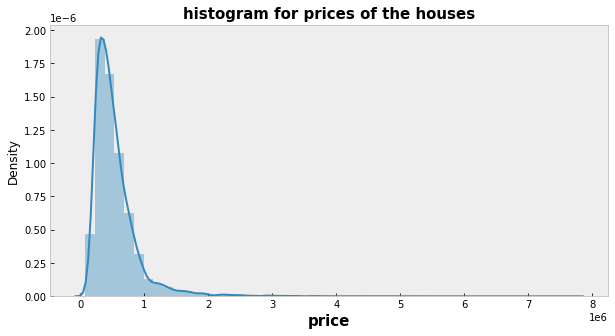

In [ ]:
#histogram
plt.figure(figsize=(10,5))
plt.grid(False)
sns.distplot(df['price'], bins=50, kde=True);
plt.title('histogram for prices of the houses',fontweight='bold',fontsize=15)
plt.xlabel('price',fontweight='bold',fontsize=15)
plt.show()

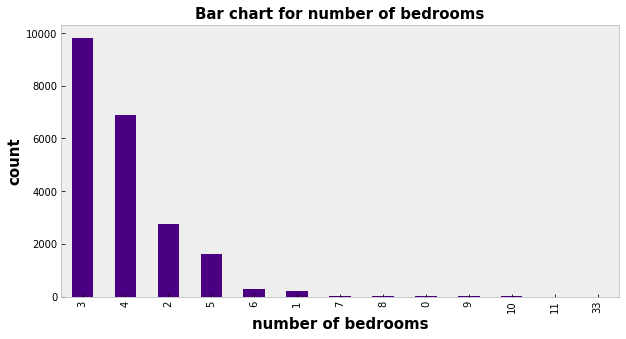

In [ ]:
# Ploting the univariate summaries and recording our observations
#
plt.figure(figsize = (10,5))
df['bedrooms'].value_counts().plot(kind = 'bar', color = 'indigo')
plt.grid(False)
plt.title('Bar chart for number of bedrooms',fontweight='bold',fontsize=15)
plt.xlabel('number of bedrooms',fontweight='bold',fontsize=15)
plt.ylabel('count',fontweight='bold',fontsize=15)
plt.show()

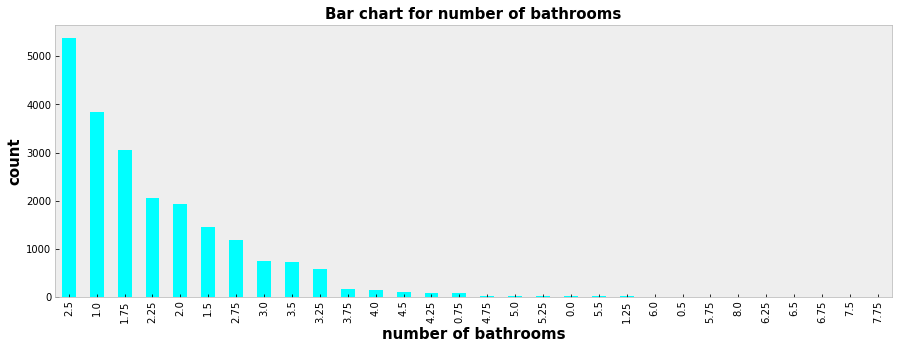

In [ ]:
plt.figure(figsize = (15,5))
df['bathrooms'].value_counts().plot(kind = 'bar', color = 'cyan')
plt.grid(False)
plt.title('Bar chart for number of bathrooms',fontweight='bold',fontsize=15)
plt.xlabel('number of bathrooms',fontweight='bold',fontsize=15)
plt.ylabel('count',fontweight='bold',fontsize=15)
plt.show()

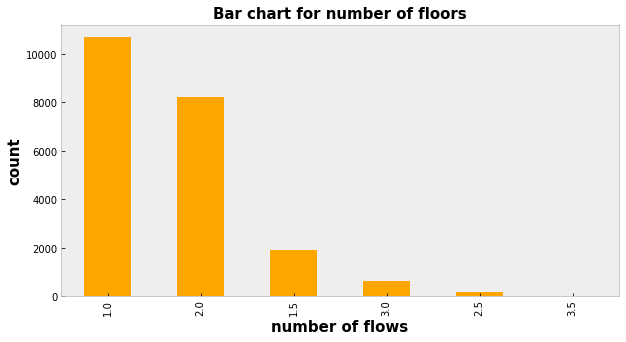

In [ ]:
plt.figure(figsize = (10,5))
df['floors'].value_counts().plot(kind = 'bar', color = 'orange')
plt.grid(False)
plt.title('Bar chart for number of floors',fontweight='bold',fontsize=15)
plt.xlabel('number of flows',fontweight='bold',fontsize=15)
plt.ylabel('count',fontweight='bold',fontsize=15)
plt.show()

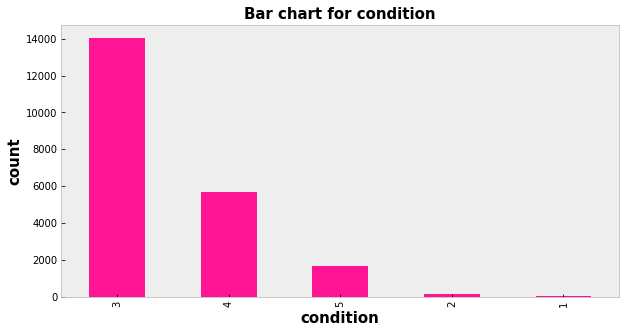

In [ ]:
plt.figure(figsize = (10,5))
df['condition'].value_counts().plot(kind = 'bar', color = 'deeppink')
plt.grid(False)
plt.title('Bar chart for condition',fontweight='bold',fontsize=15)
plt.xlabel('condition',fontweight='bold',fontsize=15)
plt.ylabel('count',fontweight='bold',fontsize=15)
plt.show()

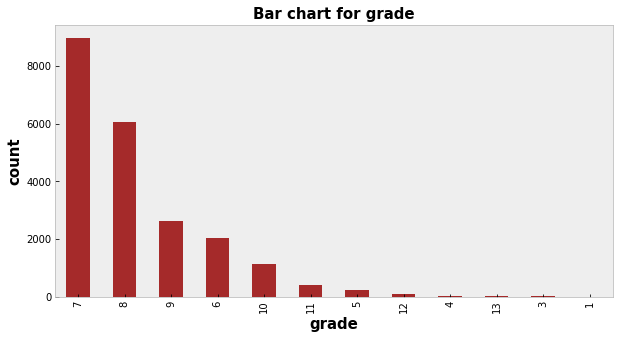

In [ ]:
plt.figure(figsize = (10,5))
df['grade'].value_counts().plot(kind = 'bar', color = 'brown')
plt.grid(False)
plt.title('Bar chart for grade',fontweight='bold',fontsize=15)
plt.xlabel('grade',fontweight='bold',fontsize=15)
plt.ylabel('count',fontweight='bold',fontsize=15)
plt.show()

 ***Observations***
- Most of the houses owned by the Hass Consultig company are three bedroomed.
- Most of the houses owned by the company have 2.5 bathrooms.
- Most of the houses have one floor.
- Most of their houses are grade 7.

### ***Bivariate***

#### ***Numerical and Numerical***

In [ ]:
df.head(2)

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,sqft_living15,sqft_lot15
0,221900.000,3,1.000,1180,5650,1.000,0,0,3,7,1180,0,1955,0,1340,5650
1,538000.000,3,2.250,2570,7242,2.000,0,0,3,7,2170,400,1951,1991,1690,7639


> ***Scatter plots***

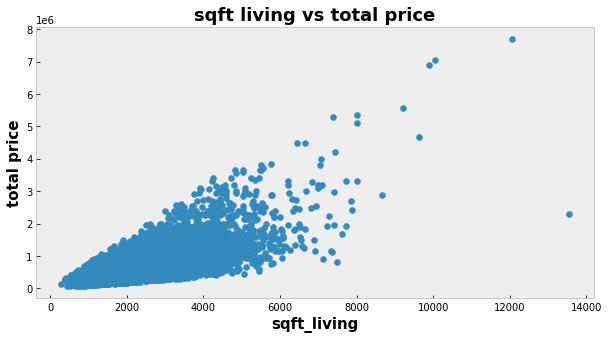

In [ ]:

# Plotting our scatterplot
plt.figure(figsize=(10,5))
plt.scatter(df["sqft_living"] , df["price"])
plt.grid(False)
# Giving our scatter plot a title
plt.title('sqft living vs total price', fontweight='bold', fontsize=18)

# Labelling our x axis
plt.xlabel('sqft_living', fontweight='bold', fontsize=15)

# Labelling our y axis
plt.ylabel('total price', fontweight='bold', fontsize=15)

# Displaying our scatterplot
plt.show()

> Increase in the Square feet area of living area increases price of a house

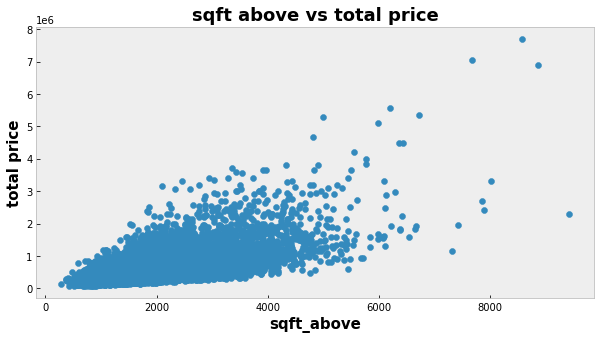

In [ ]:
# Plotting our scatterplot
plt.figure(figsize=(10,5))
plt.scatter(df["sqft_above"] , df["price"])
plt.grid(False)
# Giving our scatter plot a title
plt.title('sqft above vs total price', fontweight='bold', fontsize=18)

# Labelling our x axis
plt.xlabel('sqft_above', fontweight='bold', fontsize=15)

# Labelling our y axis
plt.ylabel('total price', fontweight='bold', fontsize=15)

# Displaying our scatterplot
plt.show()

> - Increase in the Square feet area of parking Layout increases price of a house.


> ***Bar Chart***

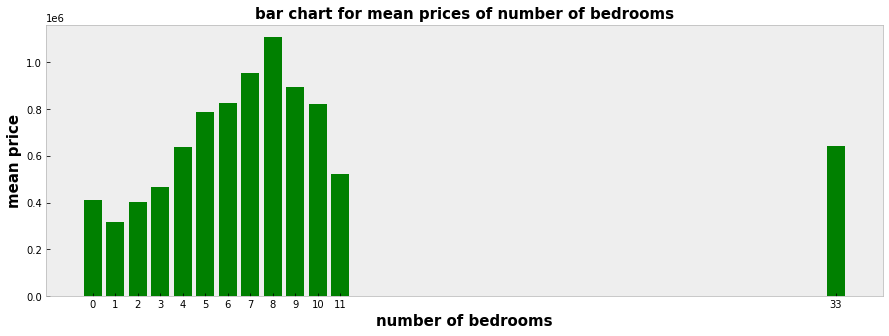

In [ ]:
grouped2 = df.groupby('bedrooms')['price'].mean().reset_index(name="Mean price of houses to bedroom")
grouped2
plt.figure(figsize=(15,5))
plt.bar(grouped2['bedrooms'],grouped2['Mean price of houses to bedroom'],color = "green")
plt.grid(False)
plt.xticks(grouped2['bedrooms'])
plt.title('bar chart for mean prices of number of bedrooms', fontweight='bold',fontsize=15)
plt.xlabel('number of bedrooms',fontweight='bold',fontsize=15)
plt.ylabel('mean price',fontweight='bold',fontsize=15)
plt.show()

> ***Box Plots***

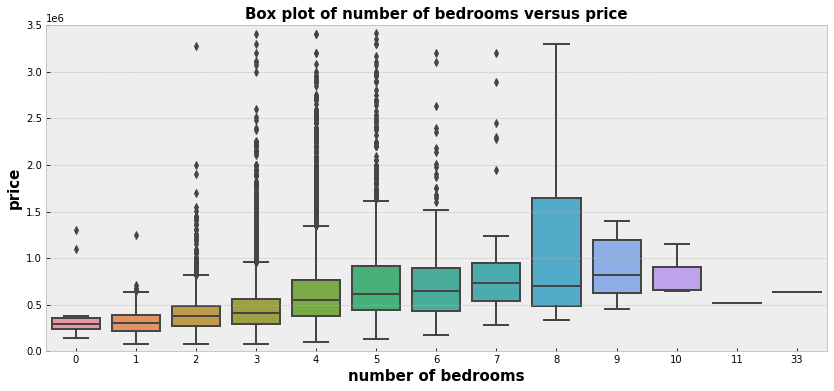

In [ ]:
#Box plot for number of bedrooms versus price 
f, ax = plt.subplots(figsize=(14, 6))
fig = sns.boxplot(x='bedrooms', y="price", data=df)
fig.axis(ymin=0, ymax=3500000);
plt.title('Box plot of number of bedrooms versus price', fontweight='bold', fontsize=15)
plt.xlabel('number of bedrooms',fontweight='bold',fontsize=15)
plt.ylabel('price',fontweight='bold',fontsize=15)
plt.show()

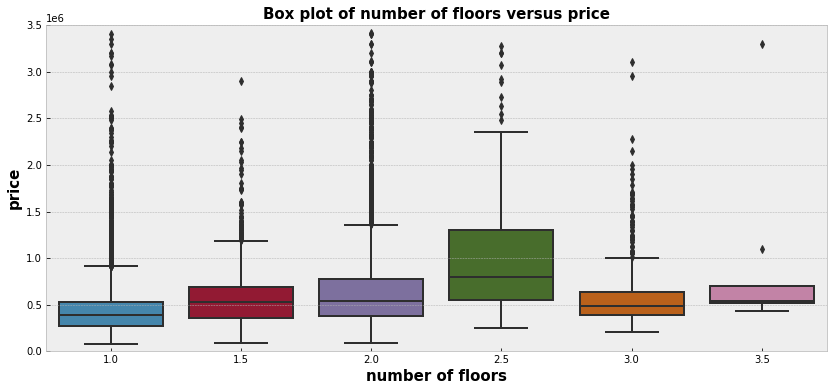

In [ ]:
#Box plot for number of number of floors versus price 
f, ax = plt.subplots(figsize=(14, 6))
fig = sns.boxplot(x='floors', y="price", data=df)
fig.axis(ymin=0, ymax=3500000);
plt.title('Box plot of number of floors versus price', fontweight='bold', fontsize=15)
plt.xlabel('number of floors',fontweight='bold',fontsize=15)
plt.ylabel('price',fontweight='bold',fontsize=15)
plt.show()

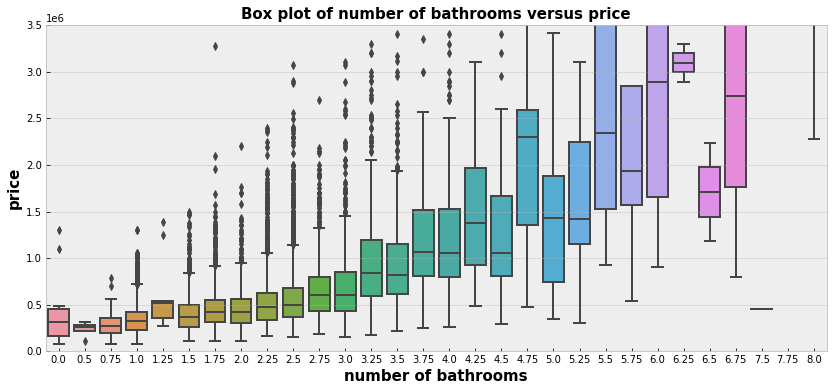

In [ ]:
#Box plot for number of number of bathrooms versus price 
f, ax = plt.subplots(figsize=(14, 6))
fig = sns.boxplot(x='bathrooms', y="price", data=df)
fig.axis(ymin=0, ymax=3500000);
plt.title('Box plot of number of bathrooms versus price', fontweight='bold', fontsize=15)
plt.xlabel('number of bathrooms',fontweight='bold',fontsize=15)
plt.ylabel('price',fontweight='bold',fontsize=15)
plt.show()

> ***Line Graphs***

Text(0, 0.5, 'sum of prices')

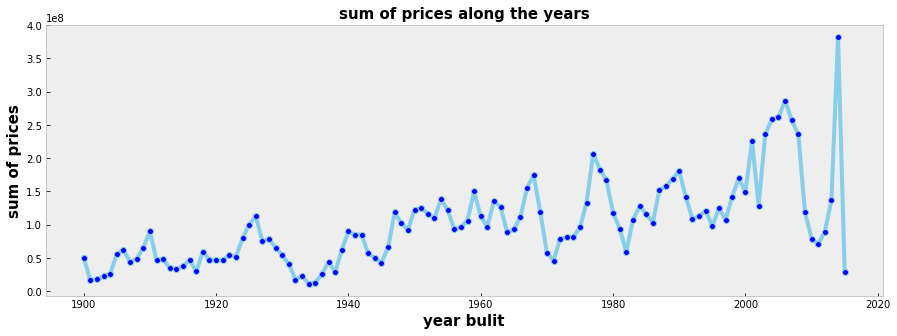

In [ ]:
grouped = df.groupby('yr_built')['price'].sum().reset_index(name="Mean price of houses per year")
grouped
plt.figure(figsize=(15,5))
plt.plot(grouped['yr_built'],grouped['Mean price of houses per year'],markerfacecolor='blue',color = 'skyblue',marker="o",linewidth= 4)
plt.grid(False)
plt.title('sum of prices along the years',fontweight='bold',fontsize=15)
plt.xlabel('year bulit',fontweight='bold',fontsize=15)
plt.ylabel('sum of prices',fontweight='bold',fontsize=15)

> ***Heat Map***

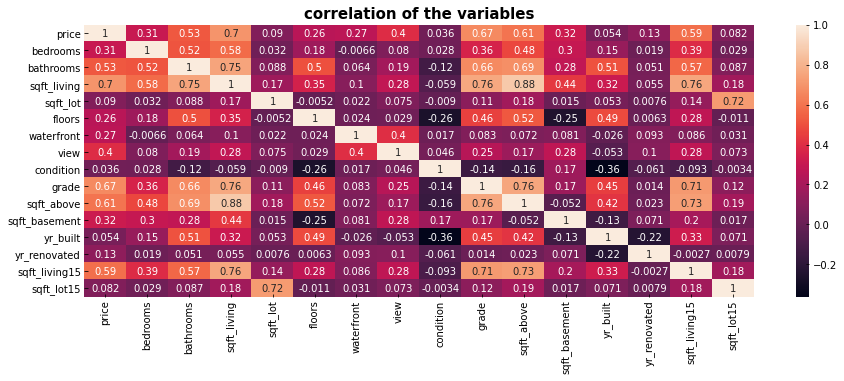

In [ ]:
#  showing correlation on a heatmap
plt.figure(figsize=(15,5))
sns.heatmap(df.corr(),annot=True)
plt.title('correlation of the variables',fontweight='bold',fontsize=15)
plt.show()
plt.show()

> - The features: square foot living area, grade(amount of floors), square feet abouve the ground level and sqft_15 features displayed the highest correlation wih the price of the house.
- There is a high correlation of sqft_living with e.g. number of bathrooms and grade. This is common sense, as the square feet increase, so does the number of floors and bathrooms. There is potential to implement clever feature engineering here.


> ***Pairplot***

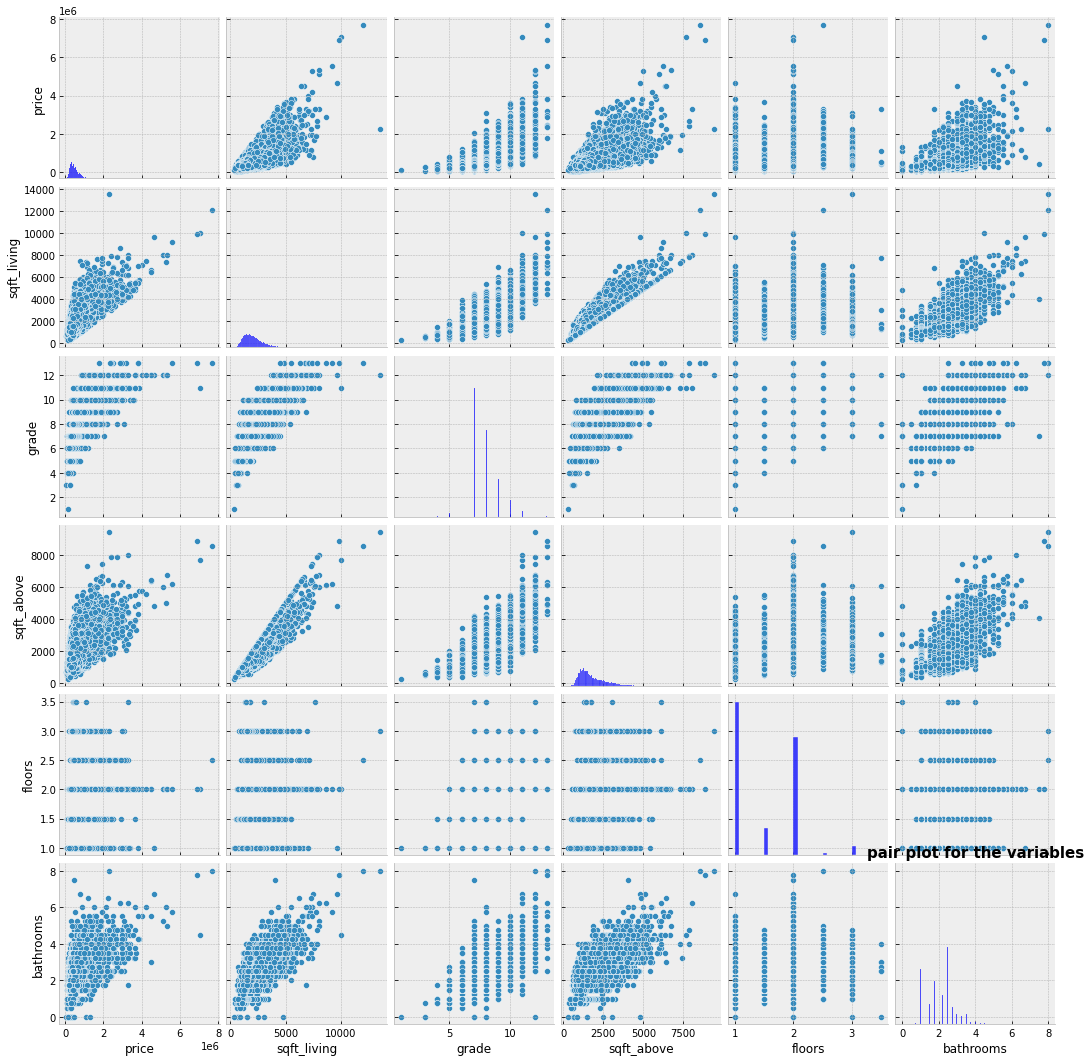

In [ ]:
#Plotting a pair plot
columns = ['price','sqft_living', 'grade', 'sqft_above', 'floors', 'bathrooms']
sns.pairplot(df[columns])
plt.grid(False)
plt.title('pair plot for the variables',fontweight='bold',fontsize=15)
plt.show()

> These scatterplots graphically shows what the details of the heatmap. There is linear correlation between sqft_living, sqft_above, bathrooms and grade. Beause of the linear relationships seen in the pairplot ,we can apply regression models to it .

In [ ]:
df.head(2)

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,sqft_living15,sqft_lot15
0,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,1340,5650
1,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,1690,7639


In [ ]:
df.drop({'yr_built','yr_renovated'}, axis=1,inplace=True)

# Implementing the Solution

## **Detecting multicollinearity**

In [ ]:
# Checking for multicollinearity on the independent variables only

F = df.drop('price', 1)
correlations = F.corr()
correlations

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,sqft_living15,sqft_lot15
bedrooms,1.000,0.516,0.577,0.032,0.175,-0.007,0.080,0.028,0.357,0.478,0.303,0.392,0.029
bathrooms,0.516,1.000,0.755,0.088,0.501,0.064,0.188,-0.125,0.665,0.685,0.284,0.569,0.087
sqft_living,0.577,0.755,1.000,0.173,0.354,0.104,0.285,-0.059,0.763,0.877,0.435,0.756,0.183
sqft_lot,0.032,0.088,0.173,1.000,-0.005,0.022,0.075,-0.009,0.114,0.184,0.015,0.145,0.719
floors,0.175,0.501,0.354,-0.005,1.000,0.024,0.029,-0.264,0.458,0.524,-0.246,0.280,-0.011
waterfront,-0.007,0.064,0.104,0.022,0.024,1.000,0.402,0.017,0.083,0.072,0.081,0.086,0.031
view,0.080,0.188,0.285,0.075,0.029,0.402,1.000,0.046,0.251,0.168,0.277,0.280,0.073
condition,0.028,-0.125,-0.059,-0.009,-0.264,0.017,0.046,1.000,-0.145,-0.158,0.174,-0.093,-0.003
grade,0.357,0.665,0.763,0.114,0.458,0.083,0.251,-0.145,1.000,0.756,0.168,0.713,0.119
sqft_above,0.478,0.685,0.877,0.184,0.524,0.072,0.168,-0.158,0.756,1.000,-0.052,0.732,0.194


The table above shows us how each variable relates to another. The coefficient of 1 across the diagonal makes sense, as a variable is perfectly correlated to itself. Let's use these correlations to compute the VIF score for each variable. This will require a little bit of linear algebra, but the approach is straightforward: we create a new dataframe with the *inverse* of the matrix above.

> VIF score to detect multicollinearity for the dataset

In [ ]:
#dataframe with the inverse of the correlations matrix for housing data
#use these correlations to compute the VIF score for each variable
pd.DataFrame(np.linalg.inv(correlations.values), index = correlations.index, columns=correlations.columns)

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,sqft_living15,sqft_lot15
bedrooms,1.640,-0.418,-0.260,0.043,0.084,0.064,0.109,-0.088,0.344,-0.664,-0.362,0.016,0.087
bathrooms,-0.418,2.929,-4.322,-0.007,-0.818,-0.003,0.049,0.082,-0.467,2.792,1.161,0.043,0.028
sqft_living,-0.260,-4.318,-33850528262923.855,-0.147,0.768,0.454,-0.795,-0.718,-0.419,30520545343108.141,16311772525366.572,-0.846,-0.107
sqft_lot,0.043,-0.007,-0.148,2.088,0.078,0.029,-0.054,0.013,-0.001,-0.105,0.046,0.128,-1.473
floors,0.084,-0.818,0.767,0.078,1.887,-0.006,-0.032,0.202,-0.387,-1.075,0.250,0.339,0.085
waterfront,0.064,-0.003,0.454,0.029,-0.006,1.199,-0.496,-0.005,0.047,-0.522,-0.224,0.062,-0.018
view,0.109,0.049,-0.794,-0.054,-0.032,-0.496,1.378,-0.049,-0.141,0.720,0.068,-0.244,0.012
condition,-0.088,0.082,-0.718,0.013,0.202,-0.005,-0.049,1.104,0.073,0.607,0.195,0.057,-0.012
grade,0.344,-0.467,-0.419,-0.001,-0.387,0.047,-0.141,0.073,3.153,-1.030,-0.276,-0.859,0.099
sqft_above,-0.665,2.788,30520545343108.129,-0.107,-1.076,-0.521,0.721,0.606,-1.030,-27518143315382.914,-14707132164083.686,-0.816,-0.099


In [ ]:
# Subsetting the data
a= df[['bedrooms','sqft_living','bathrooms', 'sqft_lot', 'floors',
       'condition', 'grade', 'sqft_basement',
        'sqft_living15', 'sqft_lot15']]
X = a.values
y = df['price'].values
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10)
# Training the Algorithm
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)
# coefficients for our test set attributes. 

coeff_df = pd.DataFrame(regressor.coef_, a.columns, columns=['Coefficient'])
coeff_df

# Making Predictions
# 
y_pred = regressor.predict(X_test)

print("For the model excluding sqft_above only:")
print("          The R2 score is:", r2_score(y_test, y_pred))
print('          Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

For the model excluding sqft_above only:
          The R2 score is: 0.5521231425789443
          Root Mean Squared Error: 255950.50600711146


The predicted values are a bit off.

# Residual plots and heteroskedasticity testing

Start by creating a model based on our housing data set of independent variables above, then displaying the residual plot for it.

In [ ]:
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

X =df.drop('price',axis=1)
print(X)
y = df['price'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

regressor = LinearRegression()
regressor.fit(X_train, y_train)

# This is our prediction for price based on our model
price_predict = regressor.predict(X_test)
print(price_predict)
# We now create the residual by substracting the test value from the predicted 
# value for each row in our dataset
residuals = np.subtract(y_predict, y_test)
print('residuals:\n',residuals)
# Let's describe our residual:
pd.DataFrame(residuals).describe()

print('residuals mean:\n',residuals.mean())

       bedrooms  bathrooms  sqft_living  sqft_lot  floors  waterfront  view  condition  grade  sqft_above  sqft_basement  sqft_living15  sqft_lot15
0             3      1.000         1180      5650   1.000           0     0          3      7        1180              0           1340        5650
1             3      2.250         2570      7242   2.000           0     0          3      7        2170            400           1690        7639
2             2      1.000          770     10000   1.000           0     0          3      6         770              0           2720        8062
3             4      3.000         1960      5000   1.000           0     0          5      7        1050            910           1360        5000
4             3      2.000         1680      8080   1.000           0     0          3      8        1680              0           1800        7503
...         ...        ...          ...       ...     ...         ...   ...        ...    ...         ...       

we are trying to predict:  study the factors that affect housing prices. 

Our mean on the other hand is close to 0, indicating that we tend to be fairly correct, although slightly over estimating chances by, on average

Let's show the residual plot

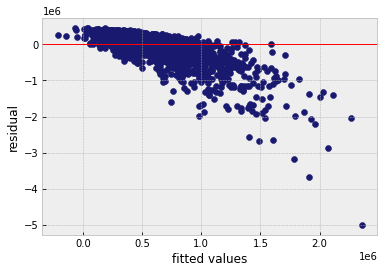

In [ ]:
import matplotlib.pyplot as plt

plt.scatter(price_predict, residuals, color='midnightblue')
plt.ylabel('residual')
plt.xlabel('fitted values')
plt.axhline(y= residuals.mean(), color='red', linewidth=1)
plt.show()

This does not look too bad: our residuals are centered around a mean that is very close to 0, and there are no glaringly obvious patterns. Let's be thorough though, and perform a heteroskedasticity test.

For this we will use [bartlett's test](https://www.itl.nist.gov/div898/handbook/eda/section3/eda357.htm). The test establishes as a null hypothesis that the variance is equal for all our datapoints,and the new hypothesis that the variance is different for at least one pair of datapoints.


In [ ]:
import scipy as sp

test_result, p_value = sp.stats.bartlett(price_predict, residuals)

# We compute a critical value of the chi squared distribution
degree_of_freedom = len(price_predict)-1
probability = 1 - p_value

critical_value = sp.stats.chi2.ppf(probability, degree_of_freedom)

# If the test_result is greater than the critical value, then
# this would mean that there are patterns to the variance of the data

# Otherwise, we can identify no patterns, and we accept that 
# the variance is homogeneous across our data

if (test_result > critical_value):
  print('the variances are unequal, and the model should be reassessed.')
else:
  print('The variances are homogeneous.')

The variances are homogeneous.


In [ ]:
# This is our prediction for price based on our model
y_predict = regressor.predict(X_test)

# The R2 score and RMSE for the linear model is 

print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_predict)))

from sklearn.metrics import r2_score

linear_R2 = a = r2_score(y_test, y_predict)
print("The R2 score for the linear model is:", linear_R2)

Root Mean Squared Error: 219587.9048206981
The R2 score for the linear model is: 0.5950885377262569


- The model predicted a 59.51% accuracy using bartllet's test.
- From the barttlets test we found out that the variances are homogeneous hence concluding that the model is acceptible

#Fitting matchine learning models

# Multiple Linear Regression

In [ ]:
from sklearn import linear_model
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
regr = linear_model.LinearRegression()
X= df.drop(["price"],axis=1)
y=df["price"]

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(X, y, random_state=3)

In [ ]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
accuracy = regressor.score(x_test, y_test)
accuracy

0.6170714739026367

> With a low variance score of 0.62, it means that our linear regression did not do a good job. 

#### ***Quantile Regression***

#### ***PCA***

In [ ]:
#importing the neccessary libraries
from scipy.stats import spearmanr
from statsmodels.graphics.gofplots import qqplot
plt.style.use('bmh')
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
from scipy import stats
from sklearn.decomposition import PCA
import statsmodels.formula.api as sm
from statsmodels.regression.quantile_regression import QuantReg
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import KFold, train_test_split
from sklearn.ensemble import GradientBoostingRegressor
import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.float_format', lambda x: '{:.3f}'.format(x)) #Limiting floats output to 3 decimal points

In [ ]:
#PCA with 5 principal components
pca = PCA(n_components = 5)
principalComponents = pca.fit_transform(X_train)
principalComponentsTest = pca.transform(X_test)
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['PrincComp_1', 'PrincComp_2','PrincComp_3','PrincComp_4','PrincComp_5'])
principalDftest = pd.DataFrame(data = principalComponentsTest
             , columns = ['PrincComp_1', 'PrincComp_2','PrincComp_3','PrincComp_4','PrincComp_5'])

In [ ]:
#getting PCA component variance ratio
print('Variance explained by all components: ' + str(pca.explained_variance_ratio_.sum()))
pca.explained_variance_ratio_

Variance explained by all components: 0.9999999990443963


array([8.91671312e-01, 1.07494193e-01, 6.63751843e-04, 1.08662016e-04,
       6.20804268e-05])

In [ ]:
#creating Principal dataframe for target training dataframe
principalDf['price'] = y_train 

In [ ]:
# importing the statsmodels library
import statsmodels.formula.api as sm
# creating a startsmodel formula using principal components and target training dataframe
mod = sm.quantreg('price ~ PrincComp_1 + PrincComp_2 + PrincComp_3 + PrincComp_4 + PrincComp_5', principalDf)
#fitting the QUantile Regression model using the quantreg package
res = mod.fit(q=.5)
#results summary 
print(res.summary())

                         QuantReg Regression Results                          
Dep. Variable:                  price   Pseudo R-squared:               0.2600
Model:                       QuantReg   Bandwidth:                   3.299e+04
Method:                 Least Squares   Sparsity:                    4.623e+05
Date:                Wed, 26 May 2021   No. Observations:                17290
Time:                        09:54:22   Df Residuals:                    17284
                                        Df Model:                            5
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept     4.88e+05   1757.938    277.601      0.000    4.85e+05    4.91e+05
PrincComp_1     0.6231      0.037     16.935      0.000       0.551       0.695
PrincComp_2    -0.1702      0.106     -1.607      0.108      -0.378       0.037
PrincComp_3   144.1599      1.349    106.893   

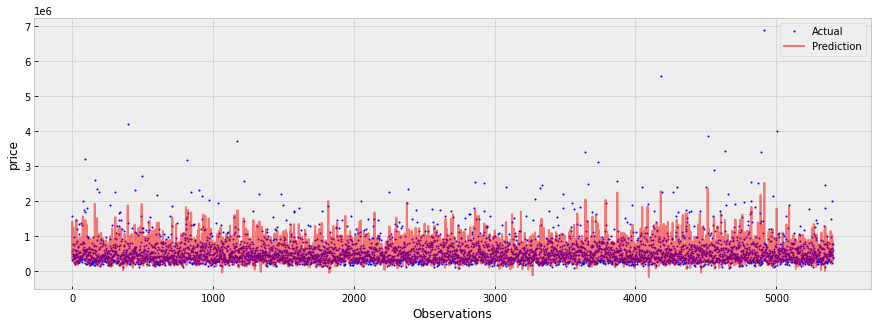

In [ ]:
# Plot the y_test and the prediction (y_pred)
fig = plt.figure(figsize=(15, 5))
plt.plot(np.arange(0,len(y_test),1), y_test, 'b.', markersize=2, label='Actual')
plt.plot(np.arange(0,len(y_test),1), y_pred, 'r-', label='Prediction', alpha =.5)
plt.xlabel('Observations')
plt.ylabel('price')
#plt.ylim(-10, 20)
plt.legend(loc='upper right');

Observations sorted by y_test values, i.e. higher index => higher SalePrice value


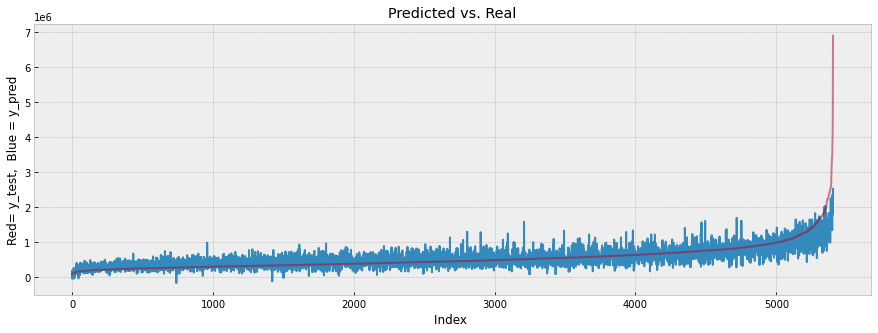

In [ ]:
#Visualizing the predicted vs actual values
predicted_df = pd.DataFrame({'y_test':y_test,'y_pred': y_pred})
predicted_df.sort_values(by=['y_test'],inplace=True)
fig = plt.figure(figsize=(15, 5))
plt.plot(np.arange(0,len(predicted_df),1), predicted_df['y_pred'])
plt.plot(np.arange(0,len(predicted_df),1), predicted_df['y_test'], alpha=0.5)
#plt.ylim(0,500000)
plt.ylabel('Red= y_test,  Blue = y_pred')
plt.xlabel('Index ')
plt.title('Predicted vs. Real');
print('Observations sorted by y_test values, i.e. higher index => higher SalePrice value');

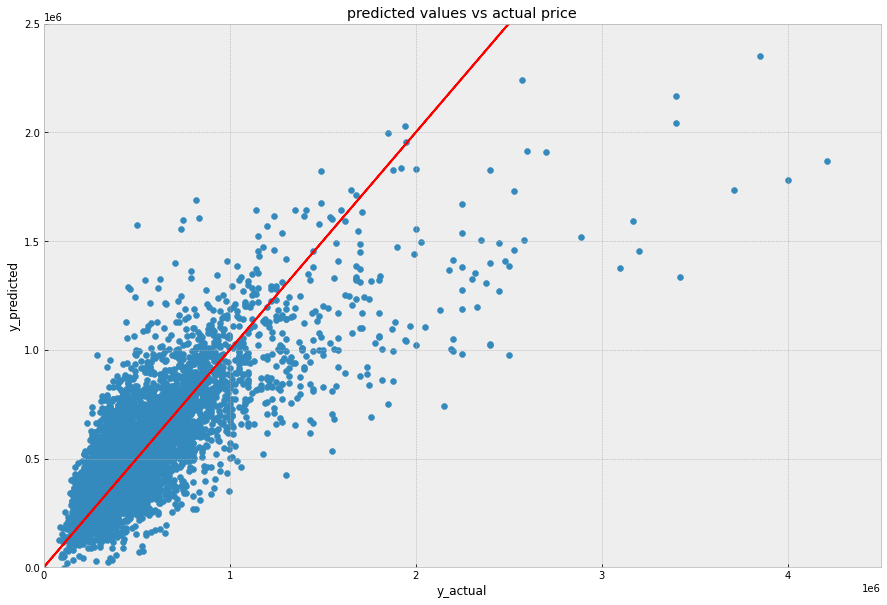

In [ ]:
#scatterplot visualization of predicted values
fig = plt.figure(figsize=(15, 10))
plt.scatter(y_test, y_pred)
plt.ylim(-1, 2500000)
plt.xlim(-1, 4500000)
plt.plot(y_pred, y_pred, "r")
plt.xlabel('y_actual')
plt.title('predicted values vs actual price')
plt.ylabel('y_predicted');

In [ ]:
## Similarly we can do the models for other quantiles
# 
quantiles = np.arange(0.1,1,0.1) 
models = []
params = []

# We build models for each quantile in our list quantiles inside a for loop
# As we build these models we also store the model parameters in a list called params. 
for qt in quantiles: 
	res = mod.fit(q = qt )
	models.append(res)
	params.append([qt, res.params['Intercept'], res.params['PrincComp_1']] + res.conf_int().loc['PrincComp_1'].tolist())

# Lastly we make a dataframe of the same name, so we we can view our different models.
params = pd.DataFrame(data = params, columns = ['qt', 'intercept', 'x_coef', 'cf_lower_bound', 'cf_upper_bound'])
print(params)

     qt  intercept  x_coef  cf_lower_bound  cf_upper_bound
0 0.100 304630.176   0.615           0.570           0.659
1 0.200 360970.050   0.676           0.626           0.727
2 0.300 405666.757   0.664           0.606           0.722
3 0.400 457334.069   0.621           0.555           0.688
4 0.500 494320.979   0.579           0.504           0.653
5 0.600 547945.435   0.572           0.502           0.643
6 0.700 574731.328   0.650           0.570           0.729
7 0.800 682236.539   0.686           0.568           0.803
8 0.900 830034.061   1.050           0.861           1.239


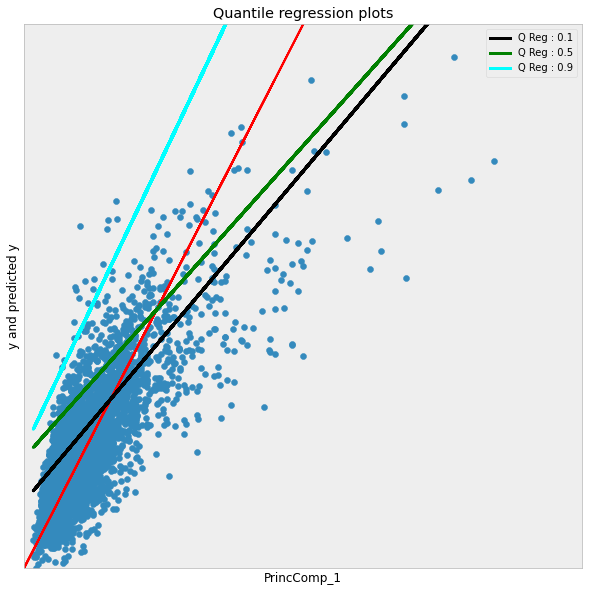

In [ ]:
#plot 0.1th, 0.5th and 0.9th quantile models against our original data.
# 
#scatterplot visualization of predicted values
fig = plt.figure(figsize=(10, 10))
plt.scatter(y_test, y_pred)
plt.ylim(-1, 2500000)
plt.xlim(-1, 5000000)
plt.plot(y_pred, y_pred, "r")
y_pred3 = models[0].params['Intercept'] + models[0].params['PrincComp_1'] *y_test
plt.plot(y_test, y_pred3, color='black',
         linewidth=3, label='Q Reg : 0.1')

y_pred4 = models[4].params['Intercept'] + models[4].params['PrincComp_1'] * y_test
plt.plot(y_test, y_pred4, color='green',
         linewidth=3, label='Q Reg : 0.5')


y_pred5 = models[8].params['Intercept'] + models[8].params['PrincComp_1'] * y_test
plt.plot(y_test, y_pred5, color='cyan',
         linewidth=3, label='Q Reg : 0.9')

plt.xticks(())
plt.yticks(())
plt.xlabel("PrincComp_1")
plt.ylabel("y and predicted y")
plt.title("Quantile regression plots")
plt.legend()

<Figure size 432x288 with 0 Axes>

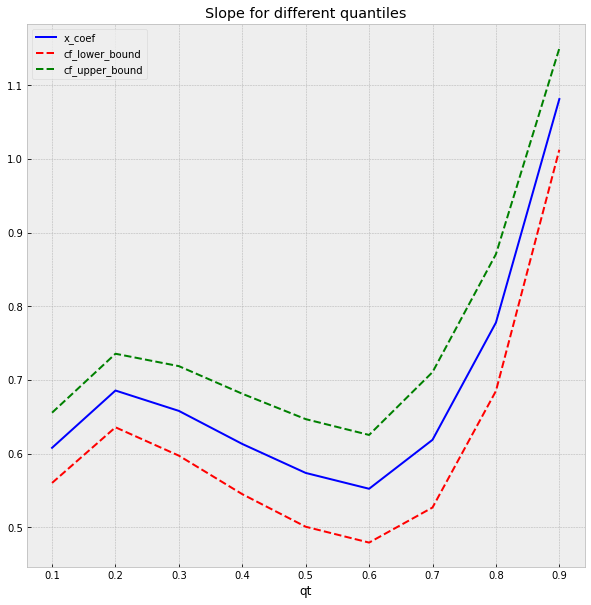

In [ ]:
plt.figure(6)
params.plot(x = 'qt', y = ['x_coef','cf_lower_bound', 'cf_upper_bound'], 
	title = 'Slope for different quantiles', kind ='line', style = ['b-','r--','g--'],figsize=(10,10))
plt.show()

In [ ]:
# Making predictions
#
y_pred = elastic.predict(X_test)
b = r2_score(y_test,y_pred)

# getting RMSE & R2 score
print("The RMSE for the Elastic model:", np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print("The R2 score for the elastic model is:", b)

> The R2 score for quantile regression is 0.52

#### ***Ridge Regression***

In [ ]:
#importing required libraries
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Ridge
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [ ]:
# installing !pip install pydataset and importing pydataset so as to use a dataset from the package
# 
!pip install pydataset
from pydataset import data 

In [ ]:
# Data Preparation
# Setting up our X and y datasets
#
X = df.drop('price',axis=1).values
y = df['price'].values

In [ ]:
# Creating our baseline regression model
# This is a model that has no regularization to it
# 
regression = LinearRegression()
regression.fit(X,y)
first_model = (mean_squared_error(y_true=y,y_pred=regression.predict(X)))
print(first_model)

# The output  value of 53022458301.19841 will be our indicator to determine if the regularized ridge regression model is superior or not.

53022458301.19841


In [ ]:
# In order to create our ridge model we need to first determine the most appropriate value for the l2 regularization. 
ridge = Ridge(normalize=True)
search = GridSearchCV(estimator=ridge,param_grid={'alpha':np.logspace(-5,2,8)},scoring='neg_mean_squared_error',n_jobs=1,refit=True,cv=10)
search

GridSearchCV(cv=10, error_score=nan,
             estimator=Ridge(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=None, normalize=True, random_state=None,
                             solver='auto', tol=0.001),
             iid='deprecated', n_jobs=1,
             param_grid={'alpha': array([1.e-05, 1.e-04, 1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02])},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='neg_mean_squared_error', verbose=0)

In [ ]:
# We now use the .fit function to run the model and then use the .best_params_ and
#  .best_scores_ function to determine the models strength. 
# 
search.fit(X,y)
search.best_params_
{'alpha': 0.01}
abs(search.best_score_) 

# The best_params_ tells us what to set alpha too which in this case is 0.01. 
# The best_score_ tells us what the best possible mean squared error is. 
# In this case, the value of 53421540417.48804 is worse than what the baseline model was. 

53421540417.48804

In [ ]:
# We can confirm this by fitting our model with the ridge information and finding the mean squared error below
#
ridge = Ridge(normalize=True,alpha=0.01)
ridge.fit(X,y)
second_model = (mean_squared_error(y_true=y,y_pred=ridge.predict(X)))
print(second_model)

53028312544.24


In [ ]:
# The 53028312544.24 is lower than the 53421540417.48804. This is because the last results are not cross-validated. 
# In addition, these results indicate that there is little difference between the ridge and baseline models. 
# This is confirmed with the coefficients of each model found below.
# 
coef_dict_baseline = {}
for coef, feat in zip(regression.coef_,df.columns):
    coef_dict_baseline[feat] = coef
coef_dict_baseline

# The coefficient values are about the same. This means that the penalization made little difference with this dataset.

{'bathrooms': 134.07896898590934,
 'bedrooms': -14869.820335851491,
 'condition': 100892.57879147443,
 'floors': 585782.3309990611,
 'grade': 52.25083468729554,
 'price': -34666.959148847454,
 'sqft_above': 81.82813394250525,
 'sqft_basement': 11.05279413043445,
 'sqft_living': 0.02676951478679257,
 'sqft_living15': -0.7497969303758509,
 'sqft_lot': -3007.098915818208,
 'view': 53860.14791661256,
 'waterfront': 59891.03720546068}

In [ ]:
# We can confirm this by fitting our model with the ridge information and finding the mean squared error below
#
ridge = Ridge(normalize=True,alpha=0.001)
ridge.fit(X_train,y_train)
y_pred = ridge.predict(X_test)


print('Ridge model Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

# Making predictions & checking accuracy using R2 score
c = r2_score(y_test, y_pred)
print("The R2 score for the ridge model is:", c)

Ridge model Root Mean Squared Error: 219586.27328533801
The R2 score for the ridge model is: 0.5950945546780078


In [ ]:
"The accuracy of our elastic model is: {}%".format(int(round(c * 100)))

'The accuracy of our elastic model is: 60%'

> The ridge regression predicted an accuracy of 60%

#### ***Lasso Regression***

In [ ]:
# Splitting our data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

In [ ]:
# Creating lasso object
# 
lasso = linear_model.Lasso() 

parameters = {'alpha': np.concatenate((np.arange(0.1,2,0.1), np.arange(2, 5, 0.5), np.arange(5, 25, 1)))}

lasso = linear_model.Lasso() 
gridlasso = GridSearchCV(lasso, parameters, scoring ='r2')

In [ ]:
# Fitting models and getting RMSE

gridlasso.fit(X_train, y_train) 
y_pred = gridlasso.predict(X_test)
d = r2_score(y_test,y_pred)

In [ ]:
print("The RMSE for the lasso model:", np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print("The R2 score for the lasso model is:",d)

The RMSE for the lasso model: 232549.041560249
The R2 score for the lasso model is: 0.593438016985985


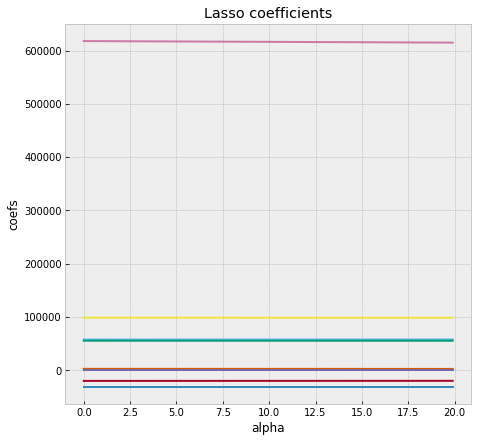

In [ ]:
# Importing library for visualization
#
import matplotlib.pyplot as plt
coefsLasso = [] 

# Building Lasso for 200 values of alpha and write the coefficients into array
# 
alphasLasso = np.arange (0, 20, 0.1) 
for i in range(200):
    lasso = linear_model.Lasso(alpha=alphasLasso[i])
    lasso.fit(X_train, y_train)
    coefsLasso.append(lasso.coef_) 

# Building Lasso coefficient plots
# 
plt.figure(figsize = (16,7))

plt.subplot(121)
plt.plot(alphasLasso, coefsLasso)
plt.title('Lasso coefficients')
plt.xlabel('alpha')
plt.ylabel('coefs')

plt.show()

# As we can see, Lasso influences less on the large coefficients, but the small ones Lasso reduces to zeroes. 
# Therefore Lasso can also be used to determine which features are important 
# to us and keeps the features that may influence the target variable

- Our model predicted an accuracy of 59.34%
- As we can see, Lasso influences less on the large coefficients, but the small ones Lasso reduces to zeroes. 
Therefore Lasso can also be used to determine which features are important to us and keeps the features that may influence the target variable

#### ***Elastic Net Regression***

In [ ]:
# Importing our libraries
# 
from pydataset import data
import numpy as np
import pandas as pd
pd.set_option('display.max_rows', 5000)
pd.set_option('display.max_columns', 5000)
pd.set_option('display.width', 10000)

from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import ElasticNet
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [ ]:
# Data Preparation
# Setting up our X and y datasets
#
a = df.drop('price',axis=1)
X = a.values
y = df['price'].values

In [ ]:
# Creating our linear regression model for the purpose of comparison
# 
regression=LinearRegression()
regression.fit(X,y)
first_model=(mean_squared_error(y_true=y,y_pred=regression.predict(X)))
print(first_model) 

# This mean standard error score of 53022458301.19841 is our benchmark for determining 
# if the elastic net model will be better or worst. 

53022458301.19841


In [ ]:
# Below are the coefficients of this first model. We use a for loop to go through 
# the model and the zip function to combine the two columns.
# 
coef_dict_baseline = {}
for coef, feat in zip(regression.coef_,a.columns):
    coef_dict_baseline[feat] = coef
coef_dict_baseline

{'bathrooms': -14869.820335851491,
 'bedrooms': -34666.959148847454,
 'condition': 53860.14791661256,
 'floors': -3007.098915818208,
 'grade': 100892.57879147443,
 'sqft_above': 52.25083468729554,
 'sqft_basement': 81.82813394250525,
 'sqft_living': 134.07896898590934,
 'sqft_living15': 11.05279413043445,
 'sqft_lot': 0.02676951478679257,
 'sqft_lot15': -0.7497969303758509,
 'view': 59891.03720546068,
 'waterfront': 585782.3309990611}

In [ ]:
# Elastic Net Model 
elastic=ElasticNet(normalize=True)
search=GridSearchCV(estimator=elastic,param_grid={'alpha':np.logspace(-5,2,8),'l1_ratio':[.2,.4,.6,.8]},scoring='neg_mean_squared_error',n_jobs=1,refit=True,cv=10)

In [ ]:
# We will now fit our model and display the best parameters and the best results we can get with that setup.
# 
search.fit(X,y)
search.best_params_
abs(search.best_score_)

53469984564.15309

In [ ]:
# The best hyperparameters was an alpha set to 0.001 and a l1_ratio of 0.8.  
# For clarity, we will set our hyperparameters to the recommended values and run on the data.
# 
elastic=ElasticNet(normalize=True,alpha=0.001,l1_ratio=0.8)
elastic.fit(X,y)
second_model=(mean_squared_error(y_true=y,y_pred=elastic.predict(X)))
print(second_model)

78763782257.87288


In [ ]:
# Below are the coefficients
# 
coef_dict_baseline = {}
for coef, feat in zip(elastic.coef_,a.columns):
    coef_dict_baseline[feat] = coef
coef_dict_baseline
# The coefficients are different

{'bathrooms': 25075.463047668916,
 'bedrooms': 9384.632563635903,
 'condition': 7509.001869106344,
 'floors': 15170.922681608385,
 'grade': 25361.92468296462,
 'sqft_above': 29.791273128943956,
 'sqft_basement': 35.60907620282053,
 'sqft_living': 32.48686384149972,
 'sqft_living15': 34.670296357010706,
 'sqft_lot': 0.052793409740790595,
 'sqft_lot15': 0.045330963366840955,
 'view': 25475.34507670391,
 'waterfront': 168931.05719169244}

In [ ]:
# Fitting the model

elastic=ElasticNet(normalize=True,alpha=0.00001,l1_ratio=0.8)
elastic.fit(X_train, y_train)

# Making predictions
#
y_pred = elastic.predict(X_test)
e = r2_score(y_test,y_pred)

# getting RMSE & R2 score
print("The RMSE for the Elastic model:", np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print("The R2 score for the elastic model is:", e)

The RMSE for the Elastic model: 232790.62692402324
The R2 score for the elastic model is: 0.5925928581162092


- The accuracy of the elastic net regression is 59.26% 

In [ ]:
# Reviewing the Solution 
# Models vs r2 score.
b=0.52
models = ['multi-linear', 'quantile', 'ridge', 'lasso', 'elastic']
r2_scores = [a,b,c,d,e]
model_results = pd.DataFrame({'Regresion models': models, 'r2_scores': r2_scores})
print(model_results)
print("**************")
print("The mean r2 scores is:", model_results.mean())
#model_results.sort_values(by = 'r2_scores',axis=0,ascending=False)

  Regresion models  r2_scores
0     multi-linear      0.595
1         quantile      0.520
2            ridge      0.595
3            lasso      0.593
4          elastic      0.593
**************
The mean r2 scores is: r2_scores   0.579
dtype: float64


## ***Conclusion***

- Multilinear and ridge regression are the best models since their accuracy is higher than for other models.
- After a thorough and exhaustive analysis using the 5 regression models above, we see that the difference between the different regression models accuracy scores using r2 scores metric is quite small and there is no clear cut difference to distinguish one from the other in terms of perfomance.

- An average accuracy of 57.9% is not really satisfactory. Thus, further analysis of data needs be done to further improve the model.

# Challenging the Solution

Our average r2_scores = 0.570. This translates to 57% accuracy which is not the best that we can have to come up with a solid marketing and pricing for our client.

# Follow up questions
- At this point, we can refine our question or collect new data, all in an iterative process to get at the truth.

# Did we have the right data? 
- YES

Do we need other data to answer our question? 
- NO

# Did we have the right question? 
- YES